<h1 style="color:white;background-color:rgb(10, 57, 125);font-size:2.5rem;font-weight:bold"> <br> &nbsp; QMUL School of Mathematical Sciences <br> </h1>

<h1> <strong> MTH5005 Programming in Python II </strong> </h1>
<h2> <strong> Week 02 Lab Workbook <strong> </h2>
<h3> <strong> <i> Dr Matthew Lewis </i> </strong> </h3>

<h2> Exercise 1: <em>Running a Python File</em> </h2>

Last week, we wrote code that created an image of the Julia set of the function $g(z) = z^2 + ( -0.7 + 0.27015i)$, colour-coded according to the number of iterations required for a complex value to surpass a bound of two in its modulus.

A condensed version of that code is available as a single script in the cell below:

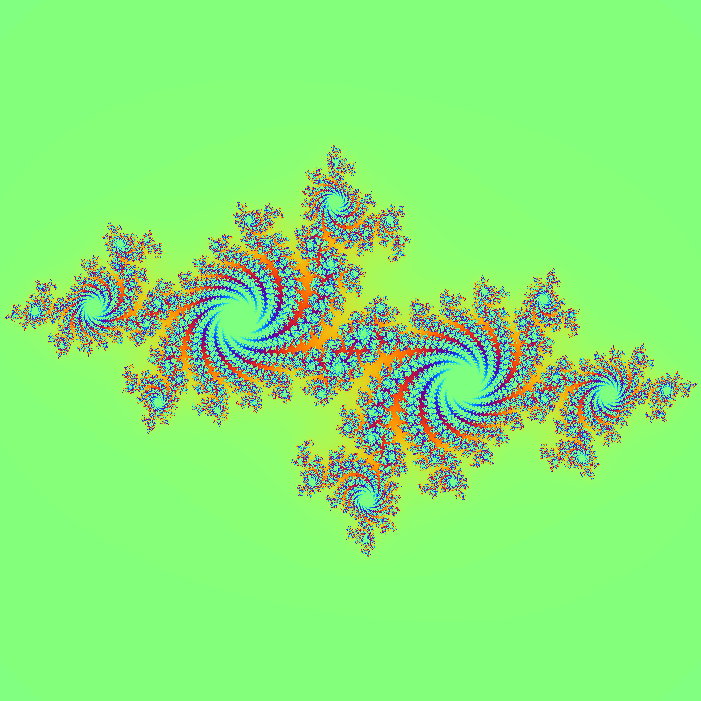

In [1]:
# Make the necessary imports.
from PIL import Image
from IPython.display import display
import math

# Define a function that maps each pixel in the array to a matching
# complex number in the square  bounded by -1.5, 1.5, -1.5i and 1.5i.
def z(x, y, l):
    """Return a complex number in the square of side-length three, centred at the origin of the complex plane,
    with relative position matching the pixel (x, y) in a square array of side-length l."""
    return (-1.5 + 3*x/l) + (1.5 - 3*y/l)*1j

# Define the mapping g, for complex values z and c.
g = lambda z, c: z**2 + c

# Define a function that counts the number of iterations required
# for a complex value z to surpass the bound of two in its modulus
# (up to some maximal cut-off point).
def count(z, c, N):
    """Return the number of times a complex value z must be run through
    the mapping g(z) = z^2 + c until its absolute value exceeds two.
    If such a value has not been obtained before N iterations, then N is returned."""
    n = 0
    while (abs(z) <= 2) and (n < N):
        z = g(z, c)
        n += 1
    return n

# Fix specific values for complex c, maximal number of iterations N, and image length, l.
c = -0.7 + 0.27015j
N = 255
l = 701

# Create blank image of appropriate size.
img = Image.new('RGB', (l, l))

# Assign colour to each pixel based on the number of iterations required
# for corresponding complex value to surpass the bound of two in its modulus.
for x in range(l):
    for y in range(l):
        n = count(z(x, y, l), c, N)
        img.putpixel((x, y), (round((N/2)*(1 + math.sin(2*math.pi*n/N))),
                              round((N/2)*(1 + math.cos(2*math.pi*n/N))),
                              round((N/2)*(1 - math.sin(2*math.pi*n/N)))
                              ))
# Display generated image. 
display(img)

Use the above code to define a function <samp>julia</samp> that accepts a complex number <samp>c</samp>, and integers <samp>l</samp> and <samp>N</samp>, and generates an image of the Julia set of the function $g(z) = z^2 + c$ with dimensions $l \times l$, colour-coded (using the above palette) according to the number of iterations required for an iterate to surpass the bound of $2$ in its modulus (with maximal number of iterations given by $N$).

In [3]:
def julia(c, l, N):
    img = Image.new('RGB', (l,l))

    two_pi_on_N = 2*math.pi/N

    for x in range(l):
        for y in range(l):
            n = count(z(x,y,l),c,N)

            r = round(N/2 * (1 + math.sin(two_pi_on_N * n)))
            gch = round(N/2 * (1 + math.cos(two_pi_on_N * n)))
            b = round(N/2 * (1 - math.sin(two_pi_on_N * n)))

            img.putpixel((x, y), (r, gch, b))
    
    return img

If the code has been defined correctly, the cell below should run, and produce an image of a new Julia set.

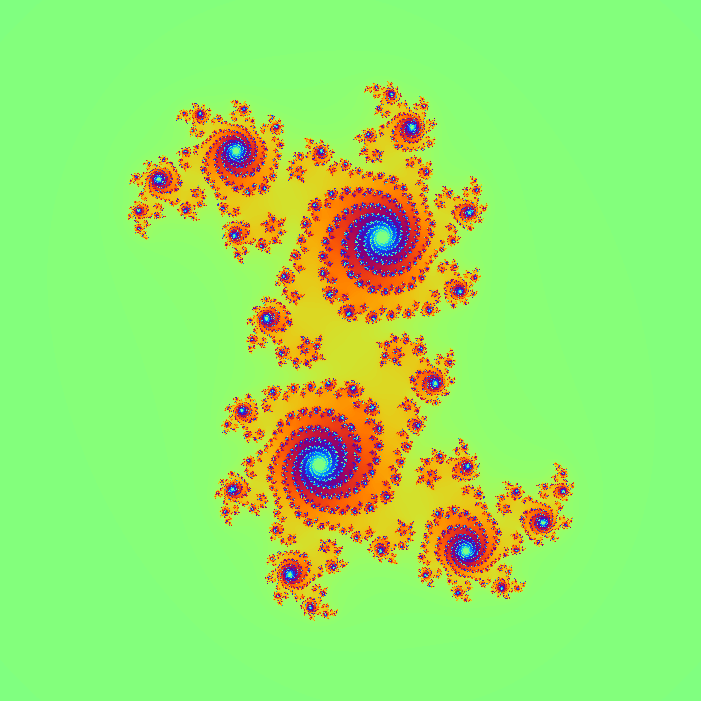

In [4]:
julia(c = 0.355 + 0.355j, l = 701, N = 255)

Open a new text file, and write into this file the above <span style="font-family:consolas;color:rgb(0,128,0);font-weight:bold;">import</span> statements, followed by the <span style="font-family:consolas;color:rgb(0,128,0);font-weight:bold;">def</span>initions of the functions <samp>z</samp>, <samp>g</samp>, <samp>count</samp> and <samp>julia</samp>, and finally, the call <code>julia(c <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color: rgb(170, 34, 255); font-weight: bold;">-</span><span style="color:rgb(0,136,0);">0.4</span> <span style="color: rgb(170, 34, 255); font-weight: bold;">+</span> <span style="color:rgb(0,136,0);">0.6j</span>, l <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color:rgb(0,136,0);">701</span>, N <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color:rgb(0,136,0);">255</span>)</code>.  Save this file under the name <samp>julia.py</samp>.  We will spend the rest of this exercise editing this file.

We begin by noting that Python files can be executed inside a terminal.  In a new tab, open a <samp>Terminal</samp> inside this current working directory, and run the command <code>python julia.py</code>.  This will execute the script written inside this file.  This will include the call to the function <samp>julia</samp>, which should produce an image on the screen.

We find instead however, that we are met with a text read-out of the form <samp><PIL.Image.Image image mode=RGB size=701x701 at 0x...></samp>.  This is because images cannot be rendered in a terminal.  If we wish to call the <samp>julia</samp> function here, we will have to give the resulting image to the user via alternate means.

The object <samp>img</samp> in our above code belongs to a class called <samp>PIL.Image.Image</samp> (technically, the class is just called <samp>Image</samp>, and <samp>PIL.Image</samp> is the module in which the class is defined).  We have seen that instances of this class have a method called <samp>putpixel</samp> that allows us to colour pixels inside the instance.

These objects also have a <samp>save</samp> method, that allows us to save the generated image in our local directory.  Modify the definition of the <samp>julia</samp> function inside <samp>julia.py</samp> so that instead of displaying the generated image, it is saved in the current working directory under the name <samp>julia.png</samp>.

Once this has been done, save these changes and run the command <code>python julia.py</code> in the terminal once more.  The code in the cell below should now load and produce the image that was generated inside <samp>julia.py</samp> upon execution.

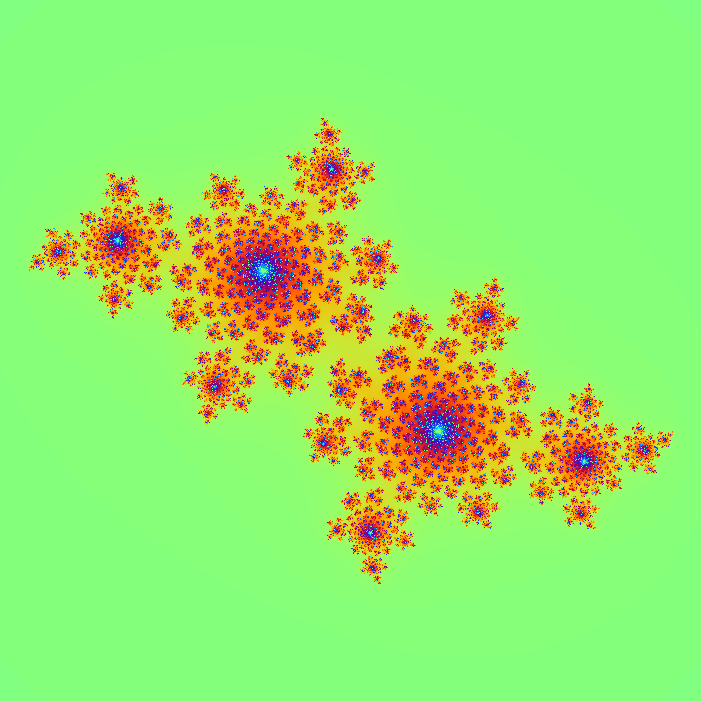

In [10]:
img = Image.open('julia.png')  # This command creates a new instance of the Image class.

display(img)

This change of code inside <samp>julia.py</samp> ensures that we will always have a copy of the generated image saved to our local directory, regardless of whether or not we are running the code in an environment that can display it.

Having said that, it is a shame for us to have to write-in the above code each time we run the <samp>julia.py</samp> file from a Jupyter Notebook.  Modify the definition of the <samp>julia</samp> function one final time, so that the image is displayed <em>only</em> if the script was run through an <span style="font-family:consolas;color:rgb(0,128,0);font-weight:bold;">import</span> statement.  (<b>Hint:</b> This does not require the use of the <samp>open</samp> method used above.)

Once this has been done, replace the call <code>julia(c <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color: rgb(170, 34, 255); font-weight: bold;">-</span><span style="color:rgb(0,136,0);">0.4</span> <span style="color: rgb(170, 34, 255); font-weight: bold;">+</span> <span style="color:rgb(0,136,0);">0.6j</span>, l <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color:rgb(0,136,0);">701</span>, N <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color:rgb(0,136,0);">255</span>)</code> at the end of the file with the following lines of code:

<pre style="background-color: rgb(247, 247, 247);
  color: rgb(0, 0, 0);
  font-family: consolas;">
    
real <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color:rgb(0,136,0);">float</span>(<span style="color:rgb(0,136,0);">input</span>(<span style="color:rgb(186,33,33);">'Real part:\t'</span>))
imag <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color:rgb(0,136,0);">float</span>(<span style="color:rgb(0,136,0);">input</span>(<span style="color:rgb(186,33,33);">'Imaginary part:'</span>))
julia(c <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> real <span style="color: rgb(170, 34, 255); font-weight: bold;">+</span> imag<span style="color: rgb(170, 34, 255); font-weight: bold;">*</span><span style="color:rgb(0,136,0);">1j</span>, l <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color:rgb(0,136,0);">701</span>, N <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color:rgb(0,136,0);">255</span>)

</pre>

Finally, save these changes to the file <samp>julia.py</samp>.  When this file is now run, the end-user will be prompted to submit the real and imaginary parts of some value $c$, and the Julia set corresponding to this value $c$ will be produced and saved (and displayed, if possible).  Run the cell below, and choose a value of $c$ (we recommend $c = -0.8 + 0.156i\,$).

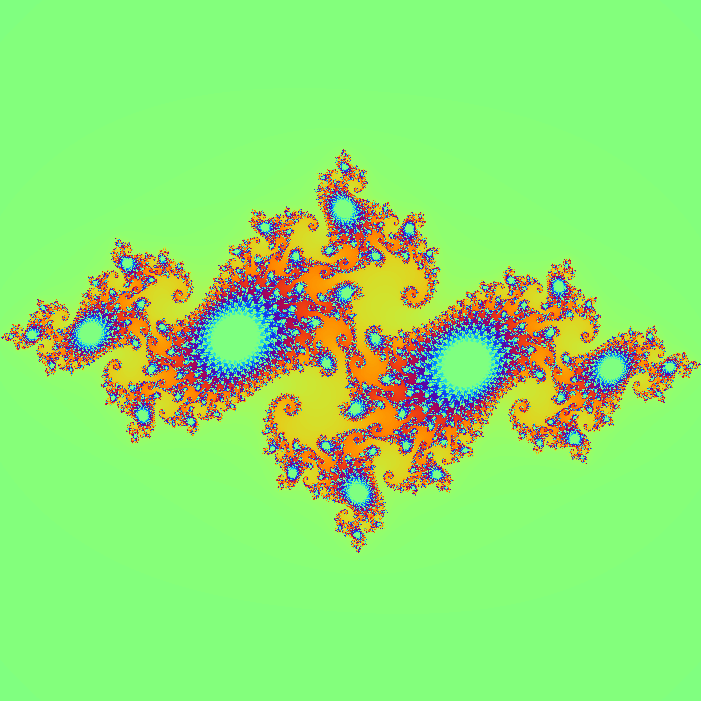

<module 'julia' from 'c:\\Users\\tom_1\\Code\\repos\\TomADavis\\MTH5005-Programming-in-Python-II\\Week 2\\julia.py'>

In [ ]:
"""wanted to try this a few times so I had to import another library to reload the import so I didnt have
 to reload the kernel everytime.
 
 Real: -0.74543, Imag: 0.11301"""

import julia
import importlib

importlib.reload(julia)


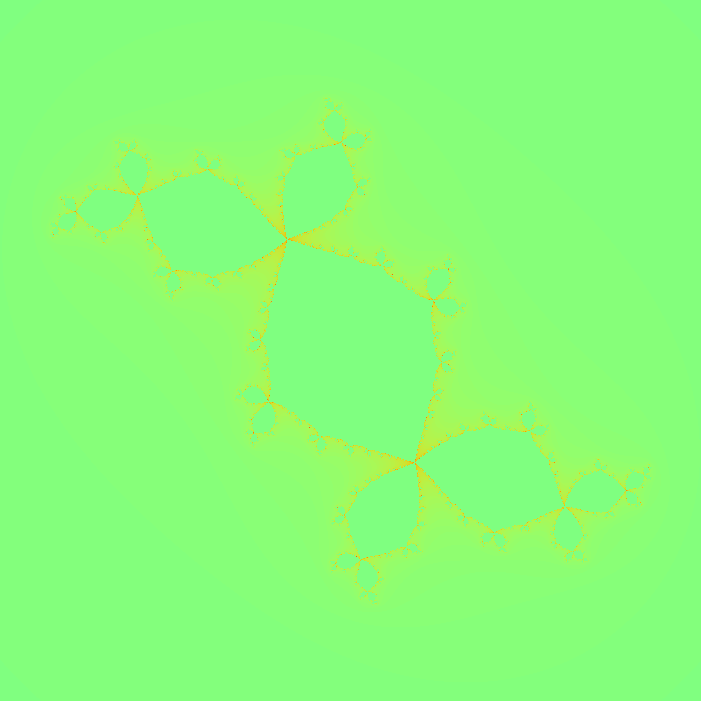

<module 'julia' from 'c:\\Users\\tom_1\\Code\\repos\\TomADavis\\MTH5005-Programming-in-Python-II\\Week 2\\julia.py'>

In [16]:
"""Real: -0.12, Imag: 0.74"""

importlib.reload(julia)

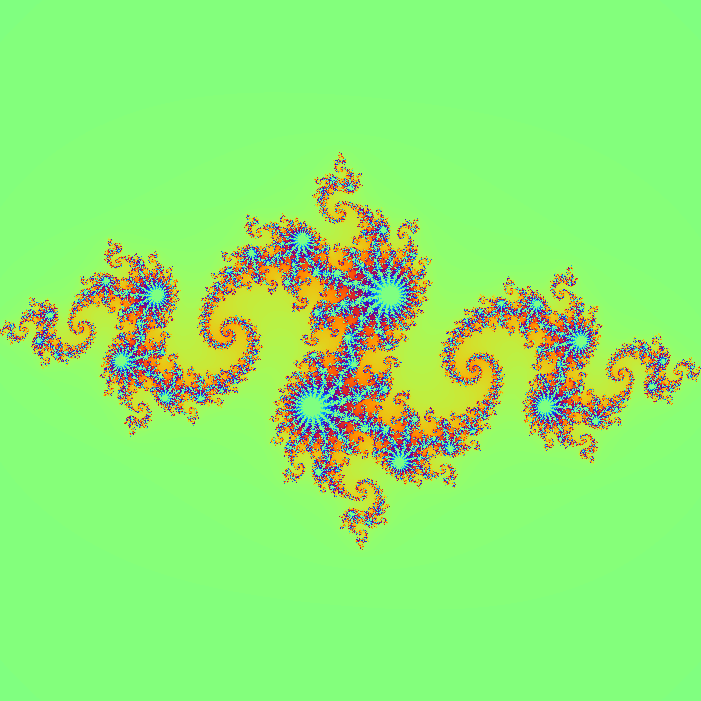

<module 'julia' from 'c:\\Users\\tom_1\\Code\\repos\\TomADavis\\MTH5005-Programming-in-Python-II\\Week 2\\julia.py'>

In [17]:
"""Real: -0.8, Imag: 0.156"""

importlib.reload(julia)

<h2> Exercise 2: <em>Object Attributes</em> </h2>

In this exercise, we shall explore how to read-from and write-to to the attributes of an object.  First, ensure that the Python file <samp>face.py</samp> is included in the current working directory (the same folder as this workbook).  This file includes a script that defines a class called <samp>Smile</samp>.  In the cell below, import the class <samp>Smile</samp> from <samp>face</samp>.

In [18]:
from face import Smile

This file was written specifically for this exercise, so it's clear we would have no prior knowledge of the way in which instances of <samp>Smile</samp> could be constructed or used.

Call a function that gives the documentation for the class <samp>Smile</samp>, in order that we might get instructions on how to use this class.

In [19]:
help(Smile)

Help on class Smile in module face:

class Smile(builtins.object)
 |  Smile(width=1, angle=0)
 |
 |  Class to render images of smiley faces.
 |
 |  Attributes
 |  ----------
 |
 |  width: int/float
 |         The width of the face's smile.
 |
 |  angle: int/float
 |         The angle about which the face is rotated (in radians).
 |
 |  background: tuple
 |              Tuple corresponding to the RGB colour-code for the background.
 |
 |  face: tuple
 |        Tuple corresponding to the RBG colour-code for the face.
 |  ----------
 |
 |  To construct an instance, call the constructor Smile, with parameters
 |  width (default argument equal to one) and angle (default argument equal
 |  to zero).  e.g.
 |
 |  Smile(width = ..., angle = ...)
 |
 |  Methods defined here:
 |
 |  __init__(self, width=1, angle=0)
 |      This method initialises instances of Smile.
 |
 |      Attributes assigned by this method include width and angle,
 |      both of which are provided directly by the arguments

Now that we have had a chance to read through the documentation, construct an instance of <samp>Smile</samp>, such that the width of the smile is $1.2$ and its angle of rotation is $1$.

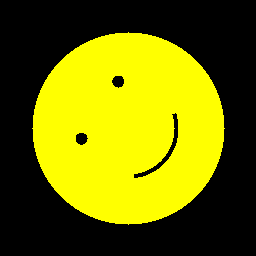

Smile(width = 1.2, angle = 1)

In [21]:
Smile(width=1.2, angle=1)

As with any object in Python, we can assign instances of this class to variables.  Recompute the instance generated above, and assign it to the variable <samp>s</samp>.

In [53]:
s = Smile(width=1.2, angle=1)

Call the <span style="font-family:consolas;color:rgb(0,136,0)">type</span> function on <samp>s</samp> to verify its origin.

In [54]:
type(s)

face.Smile

We are told in the documentation that each instance has attributes <samp>width</samp>, <samp>angle</samp>, <samp>background</samp> and <samp>face</samp>.  Print the values of each of these attributes in the cell below.

In [55]:
print(f"Smile attributes: width={s.width}, angle={s.angle}, background RGB={s.background}, face RGB={s.face}")


Smile attributes: width=1.2, angle=1, background RGB=(0, 0, 0), face RGB=(255, 255, 0)


The first two attributes were clearly defined by us upon construction of <samp>s</samp>.  Change the <samp>angle</samp> attribute so that its value is now <samp>-1</samp>.  (<b>Note:</b>  You should not create a new instance of <samp>Smile</samp> to do this, it should be done directly on <samp>s</samp>.)

In [56]:
s.angle = -1

Call the instance in the cell below to see the generated image, and observe whether this change has taken place.

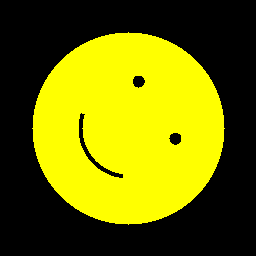

Smile(width = 1.2, angle = -1)

In [57]:
s

Similarly, change <samp>s</samp> so that the width of its smile is doubled.  Once this change has been made, call <samp>s</samp> to verify that this change has taken place.

In [58]:
s.width = 2.4

The fact that both of these assignments were accepted as valid, and that they both changed the instance <samp>s</samp> in-place, tells us that the class <samp>Smile</samp> is mutable.

Mutable objects often have a <samp>copy</samp> method.  This allows us to generate a new instance with the same attributes, but stored in an independent place in the system memory. Thus, any changes we make to the one instance, will not carry though to the other.

Unfortunately, we can verify from the documentation above that <samp>Smile</samp> objects do not have a <samp>copy</samp> method, so we will have to write our own function instead.  In the cell below, define a function <samp>copy_smile</samp> that accepts a <samp>Smile</samp> object <samp>s</samp>, and returns another with the exact same values assigned to the <samp>width</samp> and <samp>angle</samp> attributes.

In [59]:
def copy_smile(s):
    return Smile(width=s.width, angle=s.angle)

We had to name this function <samp>copy_smile</samp> to distinguish it from any other functions defined in our current session that also copy objects.

If this function were instead a <samp>Smile</samp> method (i.e. <code>s.copy_smile()</code>, as opposed to our <code>copy_smile(s)</code>), then we would not have to give the function such a clunky name, as the scope of this name would be limited to the attributes of <samp>Smile</samp> objects.  Therefore, using a simple name like <samp>copy</samp> would not present a danger of overwriting <samp>copy</samp> methods defined for <em>other</em> classes.

This is a key advantage to <b>object-oriented programming</b>.  Unfortunately, since we are not yet familiar with writing new methods, we are stuck with old-fashioned <b>functional programming</b>, and so <samp>copy_smile</samp> it is!

In the cell below, use this <samp>copy_smile</samp> function to copy the <samp>Smile</samp> instance <samp>s</samp>, and assign it to a variable <samp>t</samp>.

In [60]:
t = copy_smile(s)

We can see from the class documentation above, that <samp>width</samp> and <samp>angle</samp> are not the only attributes of <samp>Smile</samp> instances, they are merely the only attributes we are allowed to select upon construction.

Use an attribute listed in the documentation of <samp>Smile</samp> to change the colour of the face of <samp>t</samp> to green.  Once this is done, call <samp>t</samp> to verify this change has taken place.

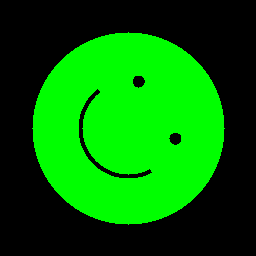

Smile(width = 2.4, angle = -1)

In [61]:
t.face = (0,255,0)

t

Verify that the <samp>copy_smile</samp> function worked as expected, and call the instance <samp>s</samp> to check whether it has also changed colour.

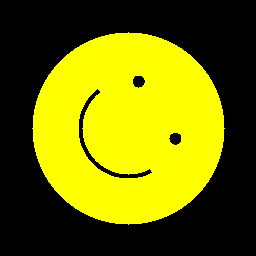

Smile(width = 2.4, angle = -1)

In [62]:
s

Aside from a <samp>copy</samp> method (which was not forthcoming), it may also have been nice to have a <samp>reset</samp> method, to enable us to return the <samp>width</samp> and <samp>angle</samp> parameters to their default values.

Again, there is no such method in the <samp>Smile</samp> class, so we are left to fall back on writing a function that accepts each instance as an argument.

In the cell below, define a function <samp>reset_smile</samp> that accepts an instance <samp>s</samp> of the <samp>Smile</samp> class, and assigns its <samp>width</samp> and <samp>angle</samp> attributes back to their default values (the default values are specified in the documentation).  (<b>Note:</b> The function should not return anything, it should change the values of the instance's attributes in-place.)

In [ ]:
def reset_smile(s0):
    s0.width=1
    s0.angle=0
    return s0


Use this <samp>reset_smile</samp> function to reset the attributes of the instances <samp>s</samp> and <samp>t</samp>.

In [63]:
s = reset_smile(s)

t = reset_smile(t)

In the cells below, verify that both <samp>s</samp> and <samp>t</samp> have been reverted to their default parameter values.

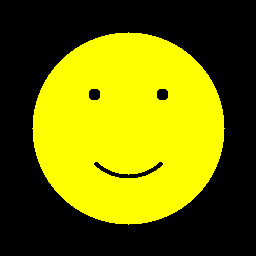

Smile(width = 1, angle = 0)

In [64]:
s

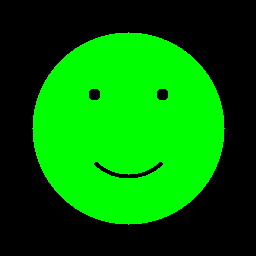

Smile(width = 1, angle = 0)

In [65]:
t

Note that because the face-colour was not given through the <samp>width</samp> or <samp>angle</samp> attributes, the instance <samp>t</samp> is still green.

In future workbooks, we will be able to modify the code that defines the <samp>Smile</samp> class to include the <samp>copy_smile</samp> and <samp>reset_smile</samp> functions as <samp>copy</samp> and <samp>reset</samp> methods.

Until then, we can practise working with a method that actually does exist.  Observe the documentation above, and notice that there are three methods defined for the <samp>Smile</samp> class: <samp>\_\_init\_\_</samp>, <samp>\_\_repr\_\_</samp> and <samp>features</samp>.

It is clear that <samp>\_\_init\_\_</samp> and <samp>\_\_repr\_\_</samp> are both dunder methods, and are therefore called implicitly through some built-in operation.  In fact, the <samp>\_\_init\_\_</samp> method assigns attributes upon construction, and the <samp>\_\_repr\_\_</samp> method generates the images.

We will focus on the <samp>features</samp> method.  This method is tailor-made for the <samp>Smile</samp> class.  In the cell below, call a built-in function that gives documentation for the <samp>features</samp> method.

In [ ]:
help(Smile.features)

Help on function features in module face:

features(self, x, y)
    This method returns a boolean according to whether the point (x, y) lies
    inside a facial feature or not.  Returned value is True if point (x, y)
    lies inside mouth or eyes, and False otherwise.

    Note that these coordinates are defined so that the centre of the image is
    (0, 0), and the x and y axes rotate with the face.  When the angle of
    the face is zero, the x-axis points right, and the y-axis points up.

Help on function __repr__ in module face:

__repr__(self)
    This methods constructs and displays an image of size 256 x 256, with
    the colour of each pixel dependent on some boolean value.

    If the boolean attached to a point is True, the background colour
    is assigned to that point. If the boolean is False, the face colour
    is assigned.

    All points outside the radius 96 are True, as are any values inside
    this radius that are returned True by the features method.



Use the <samp>features</samp> method to determine whether the points $(8, -28)$, $(-36, 36)$ and $(6, -46)$ lie within the facial features of <samp>s</samp>.

In [71]:
print(
    f"features(p1={ (8, -28) })= {s.features(8, -28)}, "
    f"features(p2={ (-36, 36) })= {s.features(-36, 36)}, "
    f"features(p3={ (6, -46) })= {s.features(6, -46)}"
)

features(p1=(8, -28))= False, features(p2=(-36, 36))= True, features(p3=(6, -46))= True


Finally, determine the proportion of the face of <samp>s</samp> that is made up of facial features.

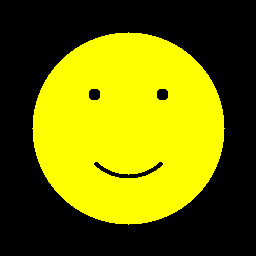

Smile(width = 1, angle = 0)

In [87]:
s.background=(0,0,0)
s

In [88]:
help(Smile.__repr__)

Help on function __repr__ in module face:

__repr__(self)
    This methods constructs and displays an image of size 256 x 256, with
    the colour of each pixel dependent on some boolean value.

    If the boolean attached to a point is True, the background colour
    is assigned to that point. If the boolean is False, the face colour
    is assigned.

    All points outside the radius 96 are True, as are any values inside
    this radius that are returned True by the features method.



In [89]:
R = 96

face_count = 0
feature_count = 0

for x in range(-R, R + 1):
    for y in range(-R, R + 1):
        if x*x + y*y <= R*R:          
            face_count += 1
            if s.features(x, y):      
                feature_count += 1

prop = feature_count / face_count
print(f"face_points={face_count}, feature_points={feature_count}, proportion={prop:.2%}")


face_points=28917, feature_points=515, proportion=1.78%


<h2> Feedback </h2>

Attempt all of these questions during the Week 02 Lab Sessions. This worksheet will be discussed in detail on a Lab Walkthrough video to be posted to QMplus at the end of the week.

If you have any problems or questions, or simply you would like some feedback, then you can:

<ul>
    <li> Ask the tutors present in your IT Lab sessions.</li><br>
    <li> Ask the Student Forum on the module's QMplus page.</li><br>
    <li> Email the lecturer for assistance.</li>
</ul>